### Knowledge reduction

- ne pas afficher les references, si au moins une des references l'utilise
- supprime un lien si un chemin plus long existe



In [81]:
%load_ext autoreload
%autoreload 2

import explorerefs as exp

233 articles loaded from cache
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
doi = '10.1063/1.868629'

In [83]:
# doi = exp.getOneRandomDoi()
exp.printInfo(doi)

[10.1063/1.868629] Effect of film elasticity on the drift velocity 
 of capillary–gravity waves
Jan Erik Weber; O/yvind Saetra - Physics of Fluids - 1995
nbr de refs:  20 - with doi: 18


## Create the graph

In [84]:
from IPython.display import Image, display, SVG

In [96]:
refgraph = exp.Referencesgraph(doi)
refgraph.nodes

311 articles loaded from cache


{'10.1063/1.868629': {'citedBy': [], 'gen': 0}}

In [99]:
refgraph.grow()

refgraph.printstats()

query error:  10.1175/1520-0485(1983)013 2.0.CO;2
query error:  10.1175/1520-0485(1978)008 2.0.CO;2
query error:  10.1175/1520-0485(1980)010 2.0.CO;2
query error:  10.1017/S0022112080000857__S0022112080000857
- done -          
nbre nodes: 206
last gen: 3


In [100]:
nRemaining = [ len( refgraph.nodesVisitedTwice(N=N) ) for N in range( 9 ) ]
nRemaining

[206, 205, 39, 17, 6, 2, 1, 0, 0]

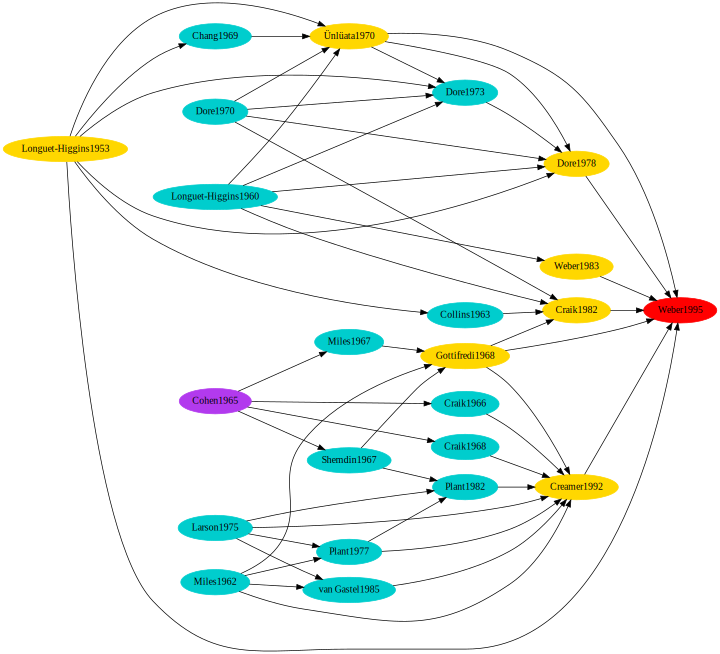

In [102]:
DG = refgraph.builtGraphviz( N = 4 )
plt = SVG(DG.render())
display(plt)

In [103]:
import networkx as nx
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.simple_paths.all_simple_paths.html

In [104]:
nodesToDraw, linksToDraw = refgraph.nodesToDraw(N = 3 )

In [105]:
linksByKeys = [ (exp.buildlabel(source), exp.buildlabel(target)) for source, target in linksToDraw]

query error:  10.1175/1520-0485(1978)008 2.0.CO;2
query error:  10.1175/1520-0485(1978)008 2.0.CO;2
query error:  10.1175/1520-0485(1978)008 2.0.CO;2


In [106]:
key2doi = { exp.buildlabel(doi):doi for doi in nodesToDraw }

query error:  10.1175/1520-0485(1978)008 2.0.CO;2


In [107]:
G = nx.DiGraph()

for source, target in linksByKeys:
    G.add_edge(source, target) 

#nx.drawing.draw(G)

In [108]:
remainingLinks = []
for source, target in linksByKeys:
    
    allpaths = list( nx.all_simple_paths( G, source, target ) )

    if len(allpaths)>1:
        print( source, target, len(allpaths) )
    else:
        remainingLinks.append( (key2doi[source],key2doi[target])   )

Wright1971 Plant1977 2
Plant1977 Creamer1992 2
Benjamin1959 Creamer1992 3
Dore1970 Dore1978 4
Dore1970 Dore1973 2
Miles1962 Creamer1992 5
Larson1975 Creamer1992 5
Larson1975 Plant1982 2
Longuet-Higgins1960 Dore1978 4
Longuet-Higgins1960 Dore1973 2
Gottifredi1968 Weber1995 3
Pierson1962 Weber1995 7
Pierson1962 Ünlüata1970 2
Dobson1971 Creamer1992 2
Kawai1979 Creamer1992 3
Longuet-Higgins1953 Weber1995 10
Longuet-Higgins1953 Dore1978 6
Longuet-Higgins1953 Ünlüata1970 2
Longuet-Higgins1953 Dore1973 3
Ünlüata1970 Weber1995 3
Ünlüata1970 Dore1978 2
Valenzuela1976 Creamer1992 3


In [109]:
from graphviz import Digraph

def parsedoi(doi):
    # bug graphviz
    doi = doi.replace(':', '')
    return doi


def builtGraphviz( self, nodesToDraw, linksToDraw ):
    """ Use Graphviz to draw the graph
        return a graphviz object

        the color is the generation number
    """
    # nodesToDraw, linksToDraw = self.nodesToDraw(N = N )

    colorGen = ['red', 'gold1', 'cyan3', 'darkorchid2', 'chartreuse2']
    # see https://graphviz.gitlab.io/_pages/doc/info/colors.html

    DG = Digraph(comment='hello', format='svg', engine='dot' , graph_attr={'size':'10' })#})'root':doi} )
    DG.graph_attr['rankdir'] = 'LR'

    for doi in nodesToDraw:
        info =  self.nodes[doi]
        DG.node(parsedoi(doi), color=colorGen[info['gen']], style='filled', label= exp.buildlabel(doi))

    for source, target in linksToDraw:
        DG.edge(parsedoi(source), parsedoi(target))  

    return DG

query error:  10.1175/1520-0485(1978)008 2.0.CO;2


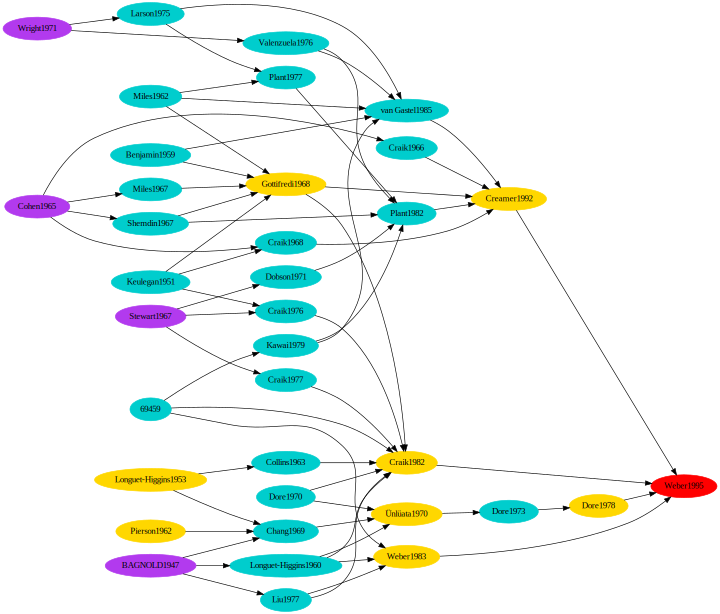

In [110]:
builtGraphviz( refgraph, nodesToDraw, remainingLinks )

'Kruder+%26+Dorfmeister'